# Volume Rendering Tutorial 

This notebook shows how to use the new (in version 3.3) Scene interface to create custom volume renderings. The tutorial proceeds in the following steps: 

1. [Creating the Scene](#1.-Creating-the-Scene)
2. [Displaying the Scene](#2.-Displaying-the-Scene)
3. [Adjusting Transfer Functions](#3.-Adjusting-Transfer-Functions)
4. [Saving an Image](#4.-Saving-an-Image)
5. [Adding Annotations](#5.-Adding-Annotations)

## 1. Creating the Scene 

To begin, we load up a dataset and use the `yt.create_scene` method to set up a basic Scene. We store the Scene in a variable called `sc` and render the default `('gas', 'density')` field.

In [1]:
import yt
import numpy as np
from yt.visualization.volume_rendering.transfer_function_helper import TransferFunctionHelper
from yt.visualization.volume_rendering.api import Scene, VolumeSource

ds = yt.load("IsolatedGalaxy/galaxy0030/galaxy0030")
sc = yt.create_scene(ds)

yt : [INFO     ] 2020-07-15 11:28:57,341 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2020-07-15 11:28:57,342 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-07-15 11:28:57,342 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-07-15 11:28:57,343 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-07-15 11:28:57,343 Parameters: cosmological_simulation   = 0.0
Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 18365.34it/s]
yt : [INFO     ] 2020-07-15 11:28:57,358 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-07-15 11:28:58,784 Setting default field to ('gas', 'density')


Note that to render a different field, we would use pass the field name to `yt.create_scene` using the `field` argument. 

Now we can look at some information about the Scene we just created using the python print keyword:

In [2]:
print (sc)

<Scene Object>:
Sources: 
    source_00: <Volume Source>:YTRegion (galaxy0030): , center=[1.543e+24 1.543e+24 1.543e+24] cm, left_edge=[0. 0. 0.] cm, right_edge=[3.086e+24 3.086e+24 3.086e+24] cm transfer_function:None
Camera: 
    <Camera Object>:
	position:[1. 1. 1.] code_length
	focus:[0.5 0.5 0.5] code_length
	north_vector:[ 0.81649658 -0.40824829 -0.40824829]
	width:[1.5 1.5 1.5] code_length
	light:None
	resolution:(512, 512)
Lens: <Lens Object>:
	lens_type:plane-parallel
	viewpoint:[-866025.33679714 -866025.33679714 -866025.33679714] code_length


This prints out information about the Sources, Camera, and Lens associated with this Scene. Each of these can also be printed individually. For example, to print only the information about the first (and currently, only) Source, we can do:

In [3]:
print (sc.get_source())

<Volume Source>:YTRegion (galaxy0030): , center=[1.543e+24 1.543e+24 1.543e+24] cm, left_edge=[0. 0. 0.] cm, right_edge=[3.086e+24 3.086e+24 3.086e+24] cm transfer_function:None


## 2. Displaying the Scene 

We can see that the `yt.create_source` method has created a `VolumeSource` with default values for the center, bounds, and transfer function. Now, let's see what this Scene looks like. In the notebook, we can do this by calling `sc.show()`. 

yt : [INFO     ] 2020-07-15 11:28:58,821 Rendering scene (Can take a while).
yt : [INFO     ] 2020-07-15 11:28:58,825 Creating volume
/home/chavlin/src/unyt/unyt/array.py:1649: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)
yt : [INFO     ] 2020-07-15 11:29:01,583 Creating transfer function
yt : [INFO     ] 2020-07-15 11:29:01,584 Calculating data bounds. This may take a while.  Set the TransferFunctionHelper.bounds to avoid this.


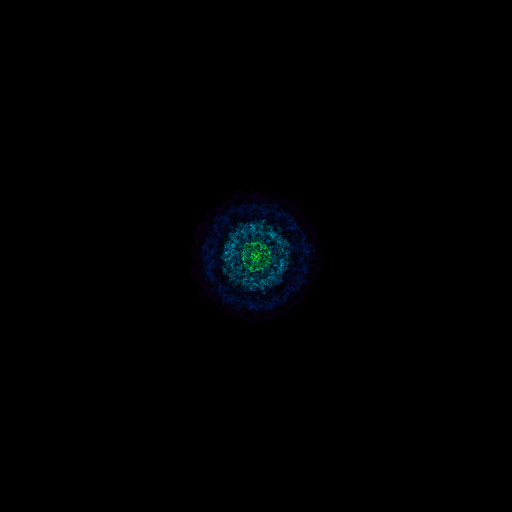

In [4]:
sc.show()

That looks okay, but it's a little too zoomed-out. To fix this, let's modify the Camera associated with our Scene. This next bit of code will zoom in the camera (i.e. decrease the width of the view) by a factor of 3.

In [5]:
sc.camera.zoom(3.0)

Now when we print the Scene, we see that the Camera width has decreased by a factor of 3:

In [6]:
print (sc)

<Scene Object>:
Sources: 
    source_00: <Volume Source>:YTRegion (galaxy0030): , center=[1.543e+24 1.543e+24 1.543e+24] cm, left_edge=[0. 0. 0.] cm, right_edge=[3.086e+24 3.086e+24 3.086e+24] cm transfer_function:<Color Transfer Function Object>:
x_bounds:[-31, -23] nbins:512 features:
	('gaussian', 'location(x):-31', 'width(x):0.002', 'height(y):(0.073,   0, 0.084, 0.001)')
	('gaussian', 'location(x):-30', 'width(x):0.002', 'height(y):(0.35,   0, 0.62, 0.0022)')
	('gaussian', 'location(x):-29', 'width(x):0.002', 'height(y):(  0, 0.26, 0.87, 0.0046)')
	('gaussian', 'location(x):-28', 'width(x):0.002', 'height(y):(  0, 0.65, 0.72, 0.01)')
	('gaussian', 'location(x):-28', 'width(x):0.002', 'height(y):(  0, 0.6, 0.031, 0.022)')
	('gaussian', 'location(x):-27', 'width(x):0.002', 'height(y):(  0, 0.87,   0, 0.046)')
	('gaussian', 'location(x):-26', 'width(x):0.002', 'height(y):(0.78, 0.98,   0, 0.1)')
	('gaussian', 'location(x):-25', 'width(x):0.002', 'height(y):(  1, 0.71,   0, 0.22)')
	(

To see what this looks like, we re-render the image and display the scene again. Note that we don't actually have to call `sc.show()` here - we can just have Ipython evaluate the Scene and that will display it automatically.

yt : [INFO     ] 2020-07-15 11:29:02,890 Rendering scene (Can take a while).


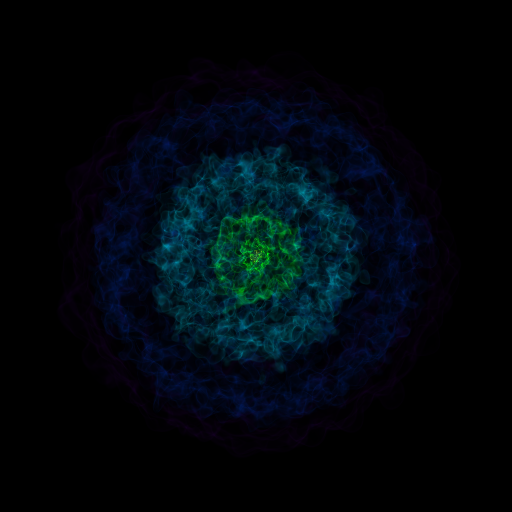

In [7]:
sc.render()
sc

That's better! The image looks a little washed-out though, so we use the `sigma_clip` argument to `sc.show()` to improve the contrast:

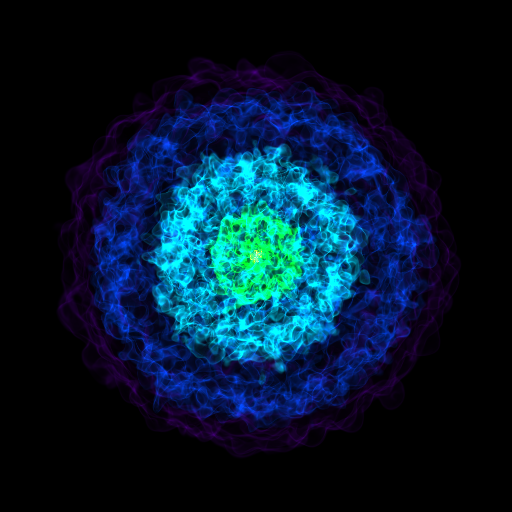

In [8]:
sc.show(sigma_clip=4.0)

Applying different values of `sigma_clip` with `sc.show()` is a relatively fast process because `sc.show()` will pull the most recently rendered image and apply the contrast adjustment without rendering the scene again. While this is useful for quickly testing the affect of different values of `sigma_clip`, it can lead to confusion if we don't remember to render after making changes to the camera. For example, if we zoom in again and simply call `sc.show()`, then we get the same image as before:

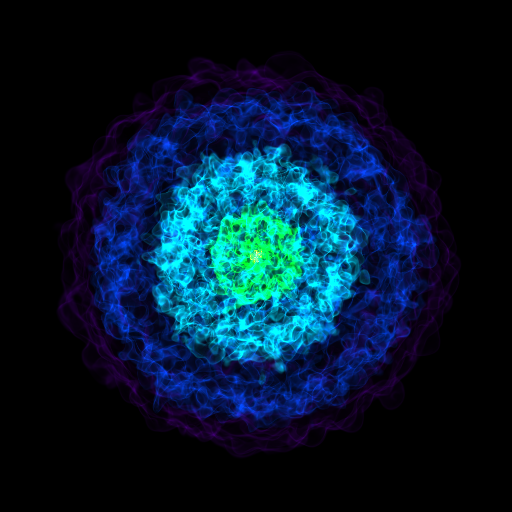

In [9]:
sc.camera.zoom(3.0)
sc.show(sigma_clip=4.0)

For the change to the camera to take affect, we have to explictly render again: 

yt : [INFO     ] 2020-07-15 11:29:06,977 Rendering scene (Can take a while).


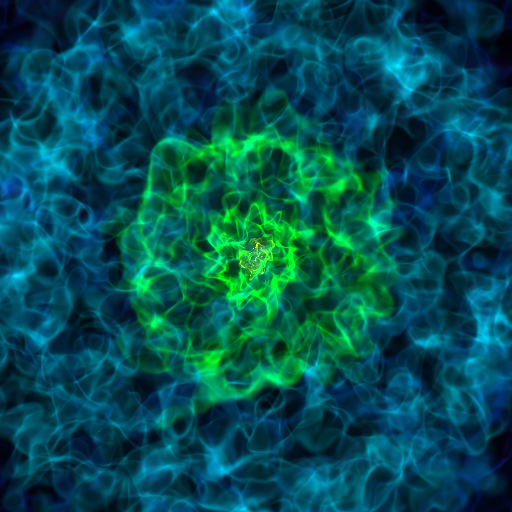

In [10]:
sc.render()
sc.show(sigma_clip=4.0)

As a general rule, any changes to the scene itself such as adjusting the camera or changing transfer functions requires rendering again. Before moving on, let's undo the last zoom:

In [11]:
sc.camera.zoom(1./3.0)

## 3. Adjusting Transfer Functions

Next, we demonstrate how to change the mapping between the field values and the colors in the image. We use the TransferFunctionHelper to create a new transfer function using the `gist_rainbow` colormap, and then re-create the image as follows:

yt : [INFO     ] 2020-07-15 11:29:15,105 Rendering scene (Can take a while).


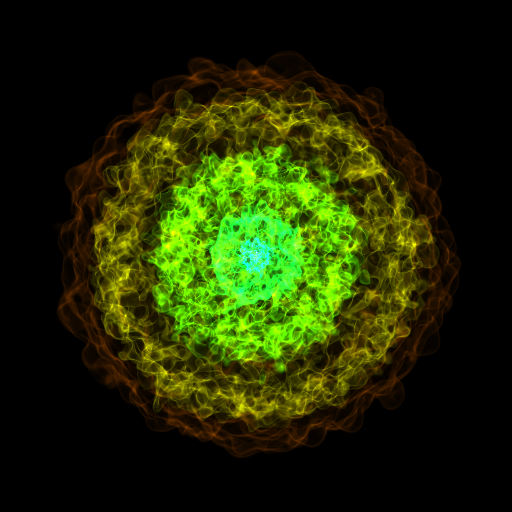

In [12]:
# Set up a custom transfer function using the TransferFunctionHelper. 
# We use 10 Gaussians evenly spaced logarithmically between the min and max
# field values.
tfh = TransferFunctionHelper(ds)
tfh.set_field('density')
tfh.set_log(True)
tfh.set_bounds()
tfh.build_transfer_function()
tfh.tf.add_layers(10, colormap='gist_rainbow')

# Grab the first render source and set it to use the new transfer function
render_source = sc.get_source()
render_source.transfer_function = tfh.tf

sc.render()
sc.show(sigma_clip=4.0)

Now, let's try using a different lens type. We can give a sense of depth to the image by using the perspective lens. To do, we create a new Camera below. We also demonstrate how to switch the camera to a new position and orientation.

In [13]:
cam = sc.add_camera(ds, lens_type='perspective')

# Standing at (x=0.05, y=0.5, z=0.5), we look at the area of x>0.05 (with some open angle
# specified by camera width) along the positive x direction.
cam.position = ds.arr([0.05, 0.5, 0.5], 'code_length')

normal_vector = [1., 0., 0.]
north_vector = [0., 0., 1.]
cam.switch_orientation(normal_vector=normal_vector,
                       north_vector=north_vector)

# The width determines the opening angle
cam.set_width(ds.domain_width * 0.5)

print (sc.camera)

<Camera Object>:
	position:[0.05 0.5  0.5 ] unitary
	focus:[0.5 0.5 0.5] code_length
	north_vector:[0. 0. 1.] dimensionless
	width:[0.5 0.5 0.5] unitary
	light:None
	resolution:(512, 512)
Lens: <Lens Object>:
	lens_type:perspective
	viewpoint:[0.75 0.5  0.5 ] code_length


The resulting image looks like:

yt : [INFO     ] 2020-07-15 11:29:19,160 Rendering scene (Can take a while).


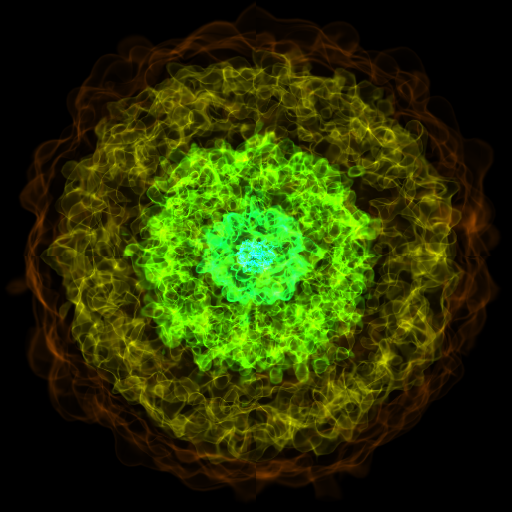

In [14]:
sc.render()
sc.show(sigma_clip=4.0)

## 4. Saving an Image

To save a volume rendering to an image file at any point, we can use `sc.save` as follows:

In [15]:
sc.save('volume_render.png',render=False)

yt : [INFO     ] 2020-07-15 11:29:22,664 Saving render volume_render.png


Including the keyword argument `render=False` indicates that the most recently rendered image will be saved (otherwise, `sc.save()` will trigger a call to `sc.render()`). This behavior differs from `sc.show()`, which always uses the most recently rendered image. 

An additional caveat is that if we used `sigma_clip` in our call to `sc.show()`, then we must **also** pass it to `sc.save()` as sigma clipping is applied on top of a rendered image array. In that case, we would do the following: 

In [16]:
sc.save('volume_render_clip4.png',sigma_clip=4.0,render=False)

yt : [INFO     ] 2020-07-15 11:29:22,779 Saving render volume_render_clip4.png


## 5. Adding Annotations

Finally, the next cell restores the lens and the transfer function to the defaults, moves the camera, and adds an opaque source  that shows the axes of the simulation coordinate system.

yt : [INFO     ] 2020-07-15 11:29:22,923 Rendering scene (Can take a while).


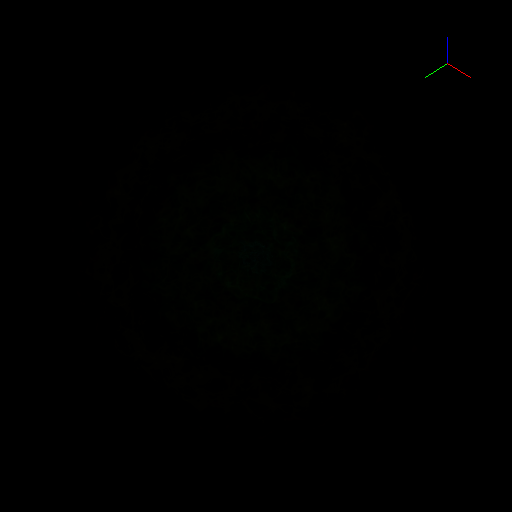

In [17]:
# set the lens type back to plane-parallel
sc.camera.set_lens('plane-parallel')

# move the camera to the left edge of the domain
sc.camera.set_position(ds.domain_left_edge)
sc.camera.switch_orientation()

# add an opaque source to the scene
sc.annotate_axes()

sc.render()
sc.show(sigma_clip=4.0)